In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/telecome data.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
#remove unnecessary columns
df=data.drop(['customerID'],axis=1)

In [7]:
#converting categorical columns to numeric columns using Label_Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

categorical_columns=['gender','Partner','Dependents','PhoneService','MultipleLines',
                     'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                     'TechSupport','StreamingTV','StreamingMovies','Contract',
                     'PaperlessBilling','PaymentMethod','Churn']

#applying label encoding to each categorical columns
for col in categorical_columns:
  df[col]=le.fit_transform(df[col].astype(str)) #obj -- str -- numbers

In [8]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [9]:
df['DeviceProtection'].unique()

array([0, 2, 1])

In [10]:
#converting TotalCharges col into numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


<Axes: xlabel='Churn'>

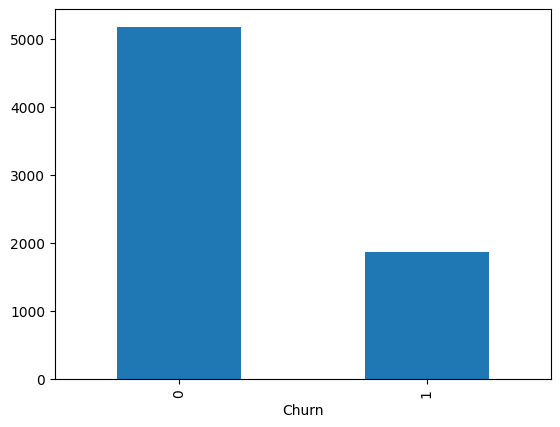

In [12]:
#Analyze "Churn" column and check the data balance - count of 'Yes' and 'No' category in 'Churn' col
df['Churn'].value_counts().plot(kind='bar')

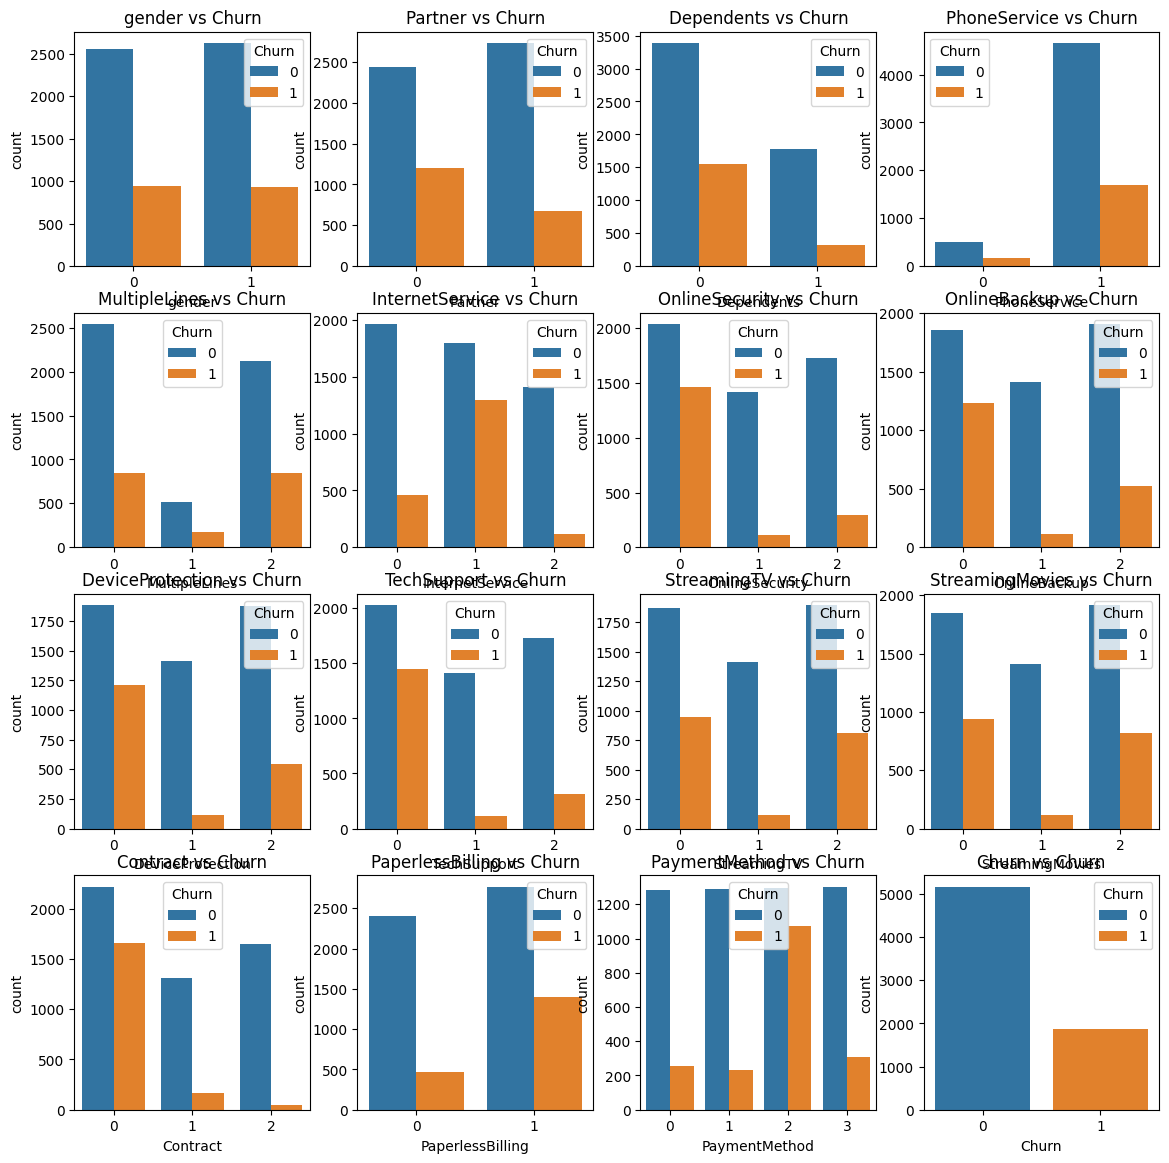

In [13]:
plt.figure(figsize=(14,14))

for i, col in enumerate(categorical_columns,1):
  plt.subplot(4,4,i)
  sns.countplot(x=col,hue='Churn',data=df) #hue parameter is responsible to show the category in form of different colours
  plt.title(f'{col} vs Churn')

plt.show()

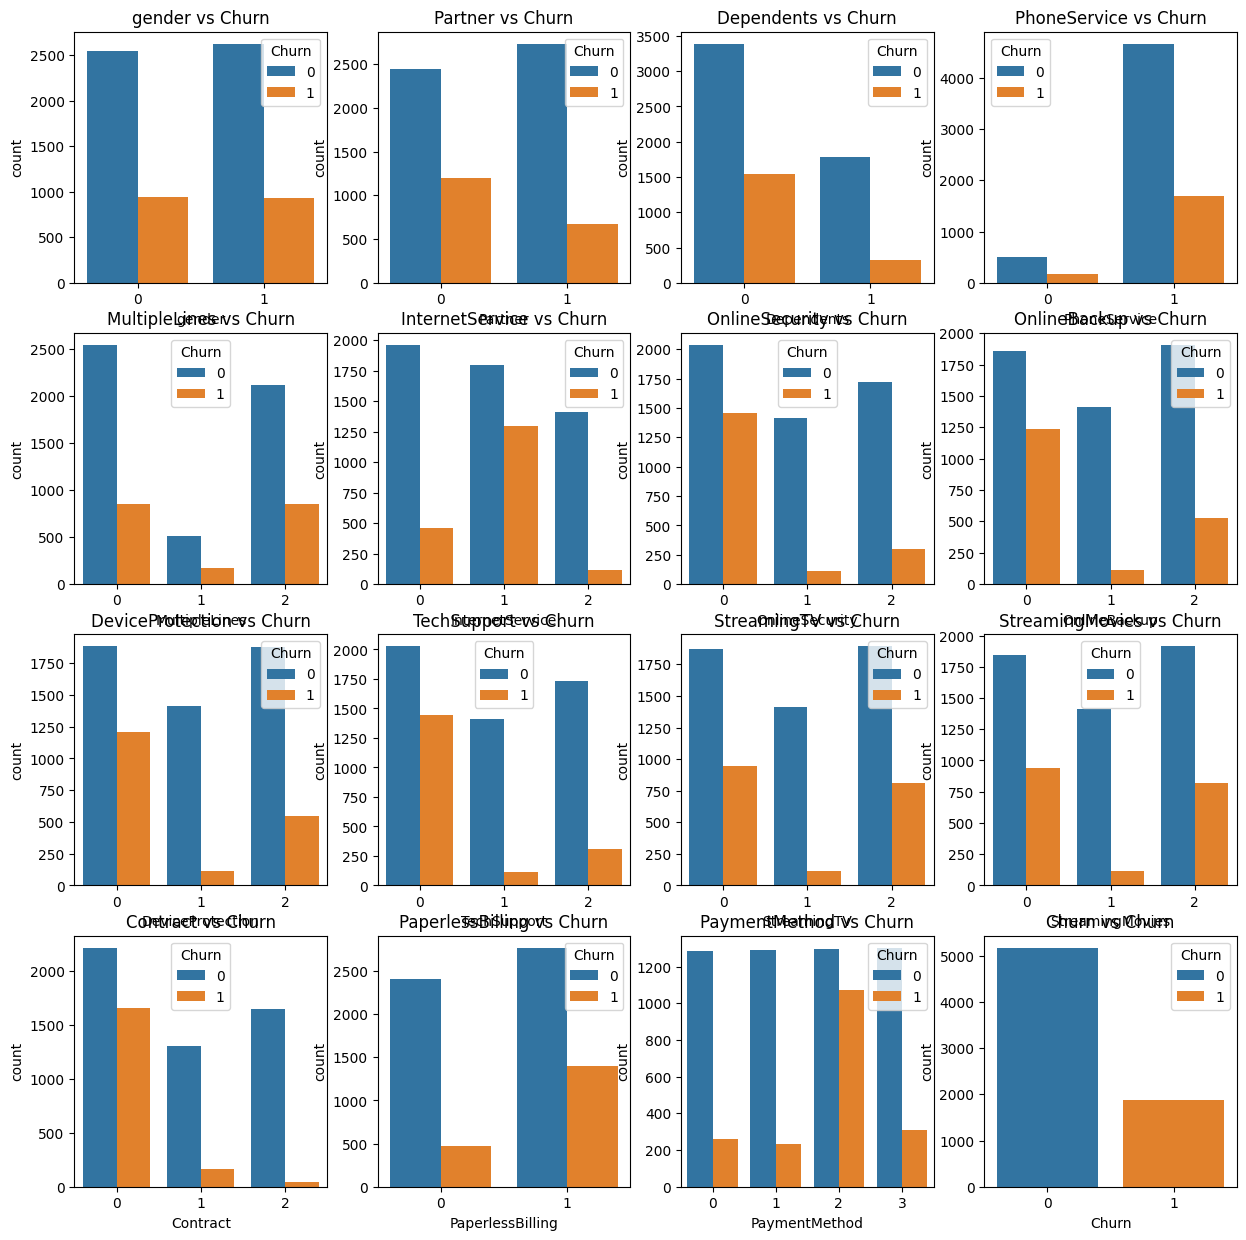

In [14]:
plt.figure(figsize=(15,15))

for i, col in enumerate(categorical_columns,1):
  plt.subplot(4,4,i)
  sns.countplot(x=col,hue='Churn',data=df) #hue is responsible to
  plt.title(f'{col} vs Churn')

plt.show()

In [22]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

<ipython-input-22-9c0f9f00c74e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


In [23]:
#divide the data into dependent and independent columns
x=df.drop(['Churn'],axis=1)
y=df['Churn']

In [34]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80)

In [35]:
#creating a SMLM using Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [36]:
x.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [37]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [38]:
#training the model
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
#predictions from the model
predictions=model.predict(x_test)

In [40]:
#checking the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [41]:
print(cm)

[[905 106]
 [182 216]]


In [42]:
print(ac)

0.7955997161107168
